In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit


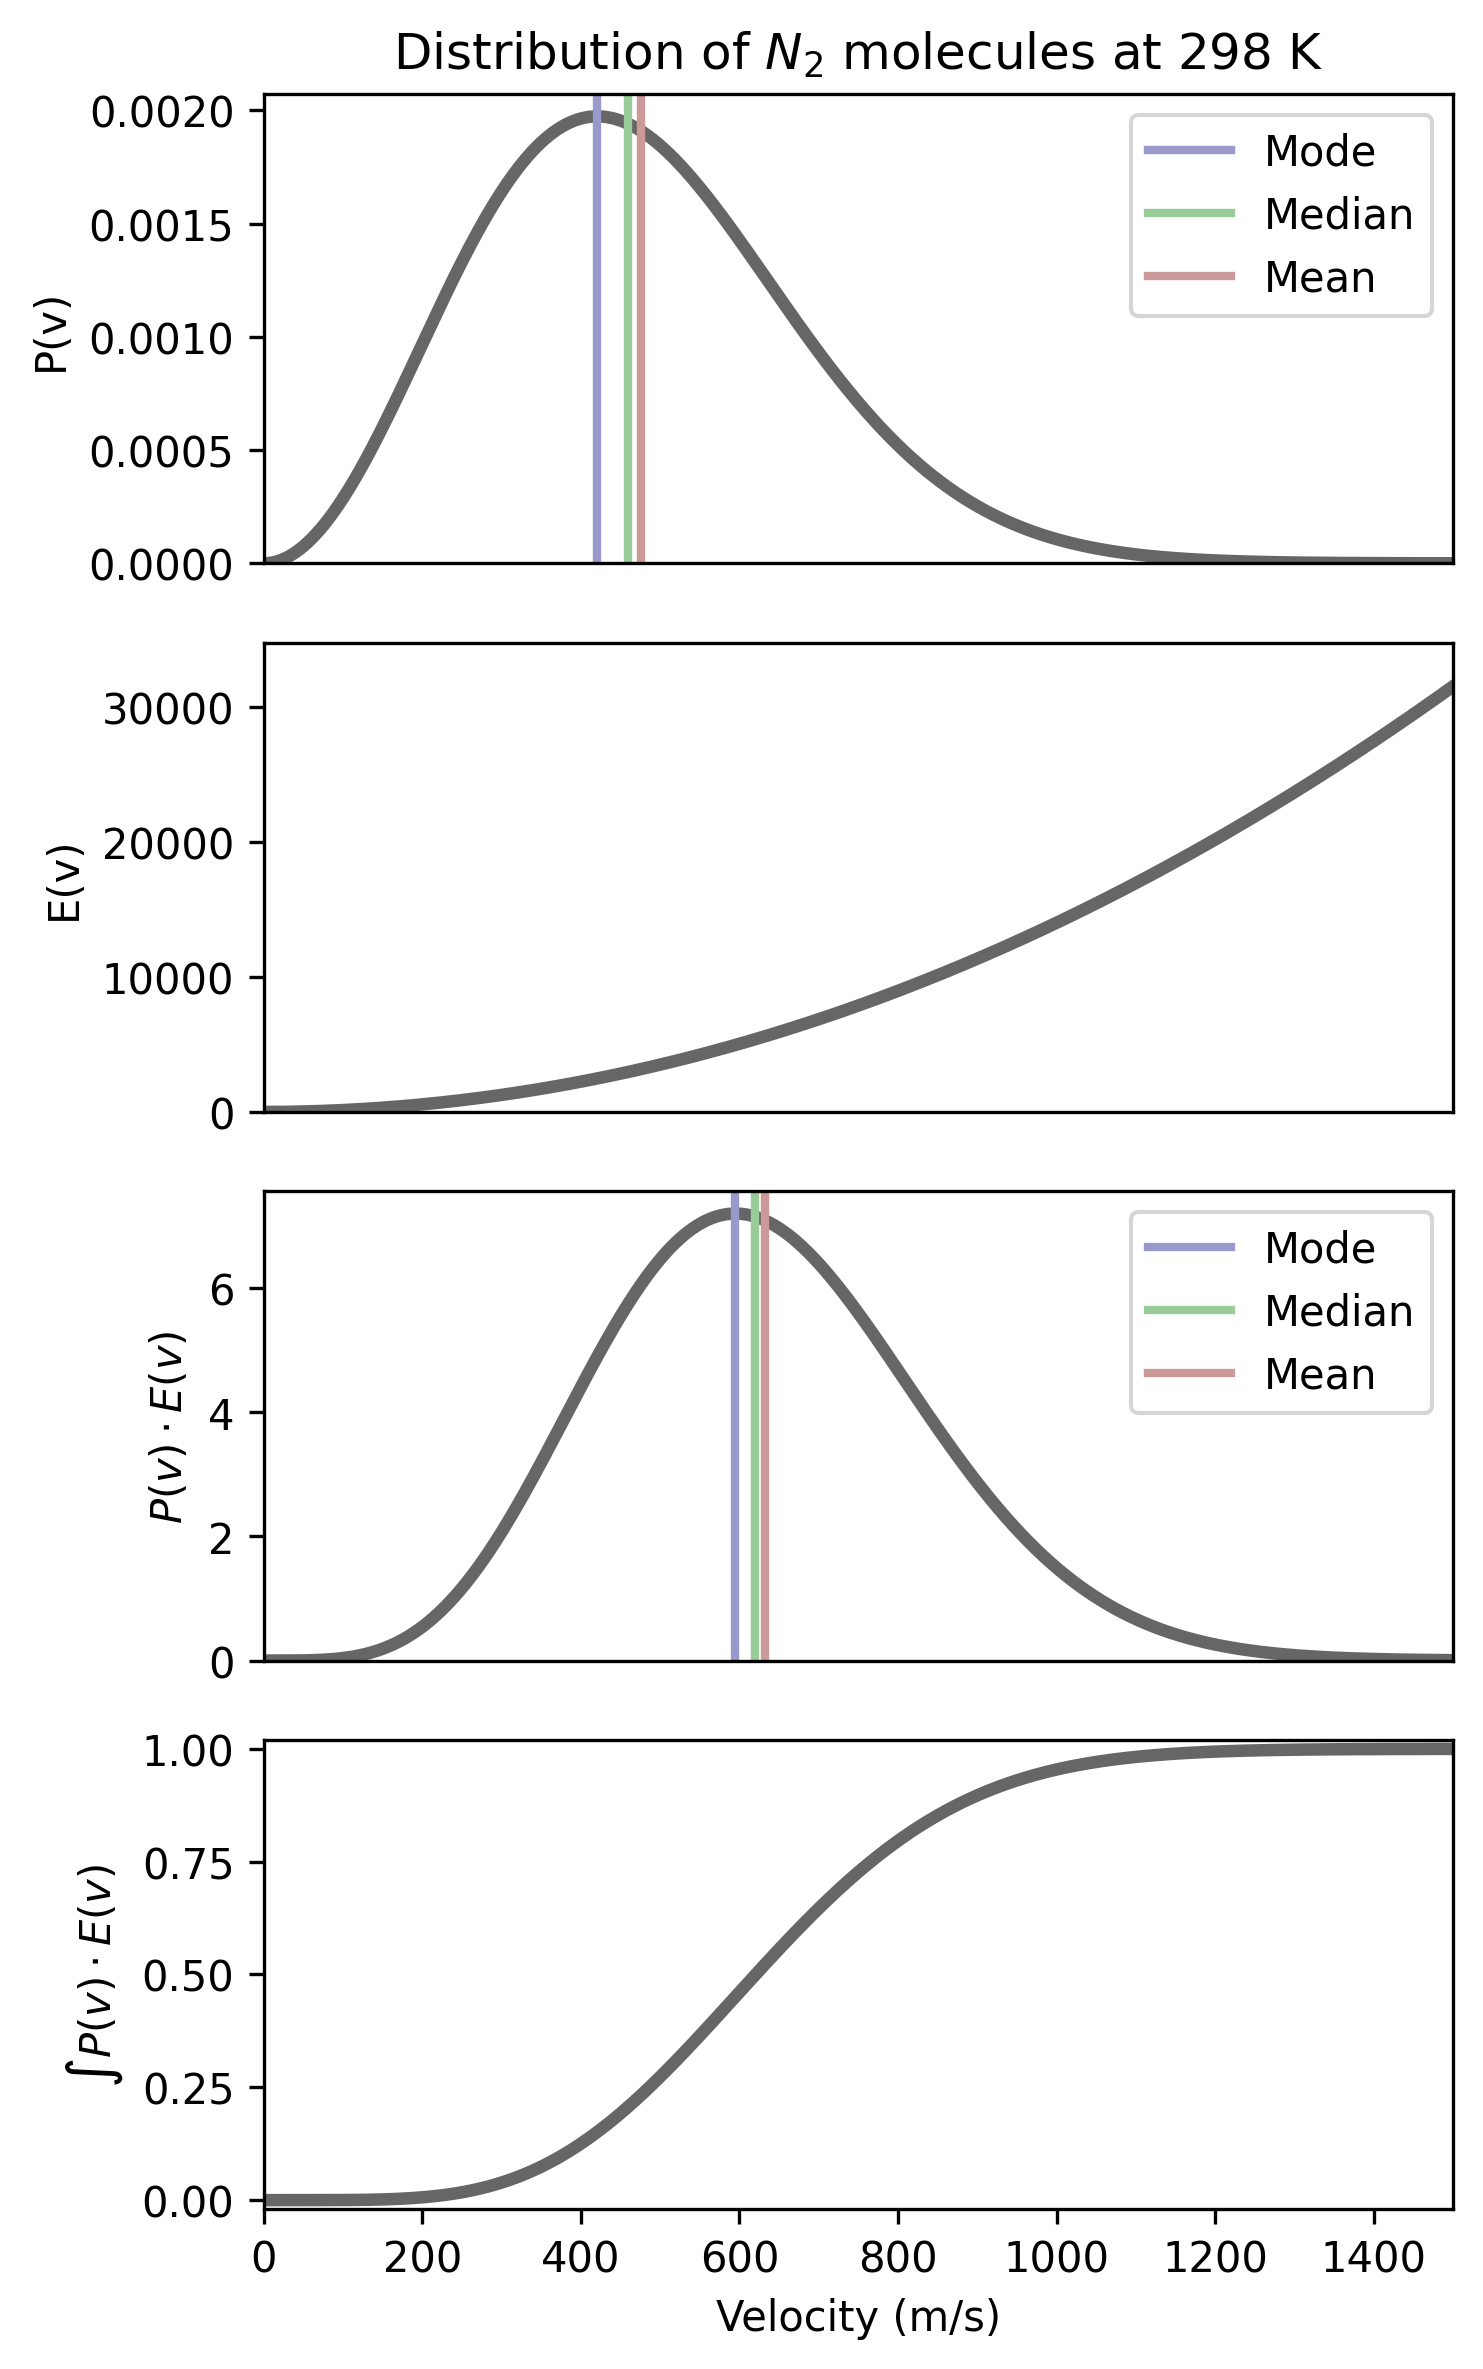

In [82]:
# Chi takes (df,loc,scale)
# Maxwell is (3,0,sigma)

R = 8.314 # Gas constant in J/(mol*K)
M = 0.028 # N2 in kg/mol
T = 298 # in K

xlim=(0,1500)

sigma = np.sqrt(R*T/M)

vs = np.linspace(0,10000,100000)

p_v = stats.chi.pdf(vs, df=3, loc=0, scale=sigma)
E_v = 0.5*M*vs**2
p_E = E_v * p_v

step = vs[1]-vs[0]
p_E_norm = p_E/(np.sum(p_E)*step)

p_E_sum = np.cumsum(p_E_norm)/(np.sum(p_E_norm)+1e-7)

fig, ax = plt.subplots(figsize=(5,8), dpi=300, nrows=4)

ylabels = ['P(v)', 'E(v)', f"$P(v) \cdot E(v)$", f"$\int P(v) \cdot E(v)$" ]

mean_color = '#cc9999'
median_color = '#99cc99'
mode_color = '#9999cc'


for i, y in enumerate([p_v, E_v, p_E, p_E_sum]):
    ax[i].plot(vs, y, color='#666666', linewidth=3)
    if i%2 == 0: # p_V and p_E
        mode = vs[np.argmax(y)]
        rng = np.random.default_rng()
        sample = rng.choice(vs, int(1e5), True, y/np.sum(y))
        mean = np.mean(sample)
        median = np.quantile(sample, 0.5)
        if i == 0:
            p_mean = mean
        
        y_min = 0
        y_max = np.max(y)*1.05
        ax[i].plot([mode]*2, [0,y_max], label='Mode', c=mode_color, linewidth=2)
        ax[i].plot([median]*2, [0,y_max], label='Median', c=median_color, linewidth=2)
        ax[i].plot([mean]*2, [0,y_max], label='Mean', c=mean_color, linewidth=2)

        ax[i].legend()

    elif i == 1:
        y_min = 0
        y_max = E_v[np.argmin(np.abs(xlim[1]*1.05-vs))]
    else:
        y_min = -0.02
        y_max = 1.02

    #ax[i].plot([p_mean]*2, [y_min,y_max], linestyle='dotted', c=mean_color, linewidth=2)
    ax[i].set(ylim=(y_min,y_max))


    ax[i].set(xlim=xlim)
    ax[i].set_ylabel(ylabels[i])

for i in range(3):
    ax[i].set_xticks([])
# Adjust y-axis
ylim_1 = (0, E_v[np.argmin(np.abs(xlim[1]*1.05-vs))])
ax[1].set(ylim=ylim_1)
ax[3].set(ylim=(-0.02,1.02))

ax[0].set_title(f"Distribution of $N_2$ molecules at {T} K")
ax[3].set_xlabel('Velocity (m/s)')



fig.tight_layout()
